## **Import Libraries**
___

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## **Read Files**
___

In [2]:
digits = load_digits()

In [3]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


## **Dataset Preprocessing**
___

In [4]:
# Convert to dataframe
df = pd.DataFrame(digits.data, columns=digits.feature_names)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [6]:
# Find the total number of duplicates
dupes = df.duplicated().sum()
print(f"Total number of duplicated values in the dataaset: {dupes}")

Total number of duplicated values in the dataaset: 0


In [7]:
# Find the total number of nulls
nulls = np.count_nonzero(df.isnull().values)
print(f"Total number of null values in the dataaset: {nulls}")

Total number of null values in the dataaset: 0


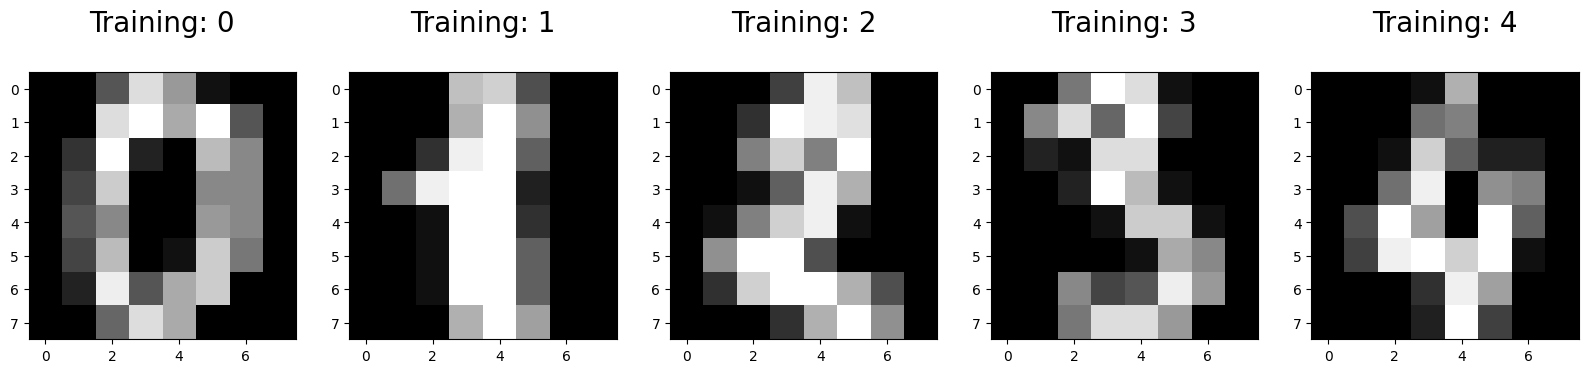

In [8]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20) 

## **Feature Engineering**
___

In [9]:
# Set a random_state that will be used for reproducibility. 
r = 1805

# Split the dependent and independent variables. 
X = digits['data']
y = digits['target']

# Split the dataset into dependent and independent variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=r)

# We split the dataset into training and test split to avoid overfitting, which is when the
# a model follows the training data of a dataset too well, but fails to reliably fit unseen data. (Jain, 2021)

## **Predictive Analysis**
___

In [10]:
def confusionMatrix(matrix: pd.DataFrame) -> None:
    """
    A function that is responsible for visualizing the confusion matrix as heatmap.

    Args:
        matrix: dataframe.
            A pandas dataframe
        title: str.
            The title of the classifier being used to create the confusion matrix.

    Returns:
        None
    """
    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title('Confusion Matrix for Tuned Random Forest on MNIST')
    plt.ylabel('Predicted Label')
    plt.xlabel('True Label')
    plt.show()

In [11]:
# Initialize the Random Forest model
random_forest_clf = RandomForestClassifier(random_state=r)
# Traing the model
random_forest_clf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_forrest = random_forest_clf.predict(X_test)
forrest_accuracy = f"{100 * accuracy_score(y_test, y_pred_forrest):.4f}"
print(f"Random Forrest Classifier Accuracy: {forrest_accuracy}")

Random Forrest Classifier Accuracy: 97.5556


`NOTES`:

* Parameter chosen to tune: max_depth.

* Random forest classifier is a ensamble classifier, which uses bagging learning method to make its predictions. A collection of decision trees are selected and are trained with random sample data from the training set. These decision trees will then be aggregated, with regards to a regression problem, or employ a voting system with regards to an classification problem (IBM, N.D.). The depth at which each tree reaches, can either result in underfitting the sample data if too shallow, or overfitting, and following the training dataset to well. A model needs to generalise well in order to perform well on data that has yet been seen by the model. (Selvaraj, 2022)

In [12]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=random_forest_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")
# Best estimator
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Best Parameters: {'max_depth': None}


`NOTES`:

* Using GridSearchCV model, we were able to instantiate a grid search using the random forest classifier as the estimator, and provided the parameter grid dictionary where the key values would represent which parameter to tune, whilst the value of the key would be the list of values to iterate over and score using the accuracy score to find the best depth within the list of values passed.  

* After training the grid search model using training data, we can access the attribute 'best_params_' to return the best performing tree depth based on the accuracy score. The returned value was 'None', which means that the best performing decision tree performed best at max depth. 

In [13]:
# Evaluate on the test set
y_pred_best_rf = best_rf.predict(X_test)
hypertuning_accuracy = f'{100 * accuracy_score(y_test, y_pred_best_rf):.4f}'
print(f"Best Random Forest Classifier Accuracy: {hypertuning_accuracy}")

Best Random Forest Classifier Accuracy: 97.5556


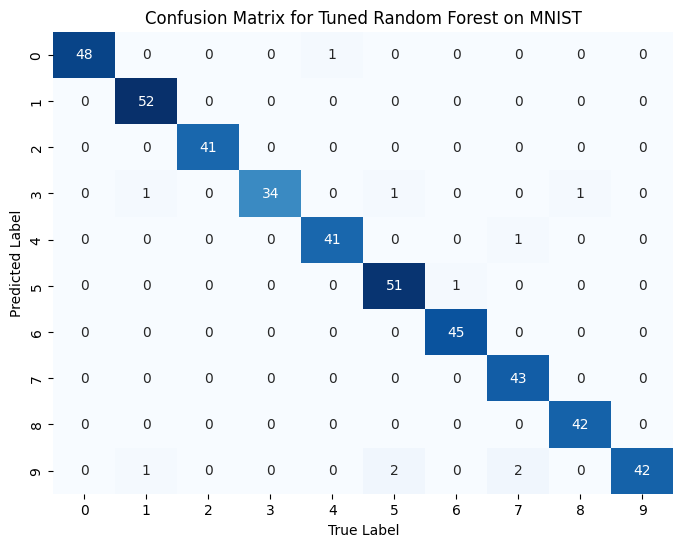

In [14]:
# Print the confusion matrix for the best model
conf_matrix = confusion_matrix(y_test, y_pred_best_rf)
confusionMatrix(conf_matrix)

`NOTES`:

* Based on the heatmap of the confusion matrix, the labels that the model struggled with most are: 
    0, 3, 4, 5, 9

In [15]:
# Generate a classification report
report = classification_report(y_test, y_pred_best_rf, output_dict=True)

# Print classification report to see precision, recall, f1-score for each class
for digit in range(10):
    print(f"Class {digit}:")
    print(f"  Precision: {report[str(digit)]['precision']:.4f}")
    print(f"  Recall: {report[str(digit)]['recall']:.4f}")
    print(f"  F1-Score: {report[str(digit)]['f1-score']:.4f}")
    print()

Class 0:
  Precision: 1.0000
  Recall: 0.9796
  F1-Score: 0.9897

Class 1:
  Precision: 0.9630
  Recall: 1.0000
  F1-Score: 0.9811

Class 2:
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

Class 3:
  Precision: 1.0000
  Recall: 0.9189
  F1-Score: 0.9577

Class 4:
  Precision: 0.9762
  Recall: 0.9762
  F1-Score: 0.9762

Class 5:
  Precision: 0.9444
  Recall: 0.9808
  F1-Score: 0.9623

Class 6:
  Precision: 0.9783
  Recall: 1.0000
  F1-Score: 0.9890

Class 7:
  Precision: 0.9348
  Recall: 1.0000
  F1-Score: 0.9663

Class 8:
  Precision: 0.9767
  Recall: 1.0000
  F1-Score: 0.9882

Class 9:
  Precision: 1.0000
  Recall: 0.8936
  F1-Score: 0.9438



## **Bibliography**
___

1. Jain, V. (2021), 'Why the train/validate/test split helps to avoid overfitting — 04', _Medium_, 23 May. Available at: https://medium.com/analytics-vidhya/training-neural-networks-for-dummies-04-pt-1-train-validate-test-split-9b1141496c63 (Accessed on: 04 September 2024)

2. IBM (N.D.), 'What is bagging?', _IBM_, N.D. Available at: https://www.ibm.com/topics/bagging (Accessed on: 04 September 2024)

3. Selvaraj, N. (2022). 'Hyperparameter Tuning Using Grid Search and Random Search in Python'. _KDNuggets_, 05 October, Available at: https://www.kdnuggets.com/2022/10/hyperparameter-tuning-grid-search-random-search-python.html#:~:text=We%20will%20now%20try%20adjusting,generalize%20well%20to%20test%20data. (Accessed on: 04 September 2024)